In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
file_path =  r"C:\Users\91965\Desktop\Project File\Electric Vehicle\Electric_Vehicle_Population_Data.csv"
df = pd.read_csv(file_path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [5]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177473 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177473 non-null  object 
 1   County                                             177473 non-null  object 
 2   City                                               177473 non-null  object 
 3   State                                              177473 non-null  object 
 4   Postal Code                                        177473 non-null  float64
 5   Model Year                                         177473 non-null  int64  
 6   Make                                               177473 non-null  object 
 7   Model                                              177473 non-null  object 
 8   Electric Vehicle Type                              177473 non-null  object 
 9 

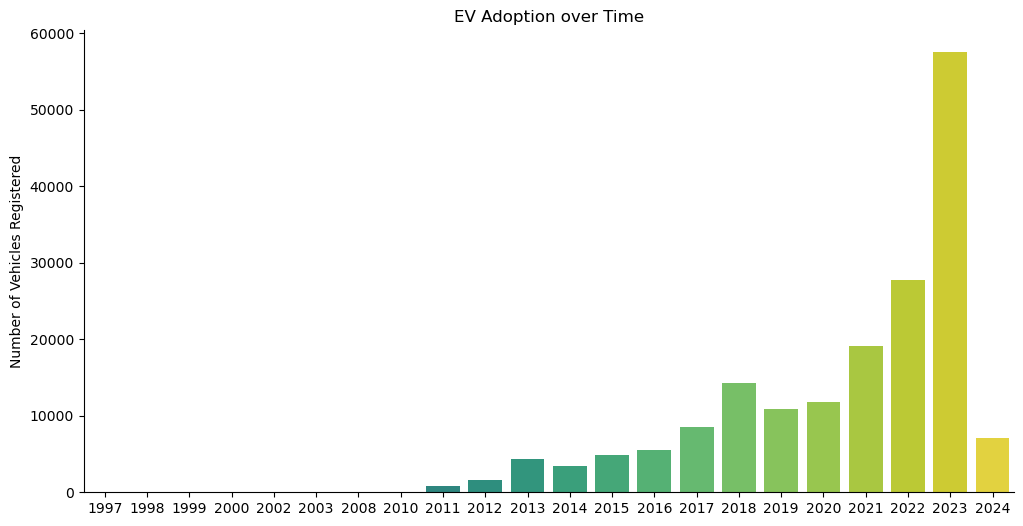

In [8]:
plt.figure(figsize=(12, 6))
df_year = df['Model Year'].value_counts().sort_index()
sns.barplot(x= df_year.index, y= df_year.values,hue = df_year.index,palette="viridis", legend=False)
sns.despine()
plt.xlabel("")
plt.ylabel('Number of Vehicles Registered')
plt.title('EV Adoption over Time')
plt.show()

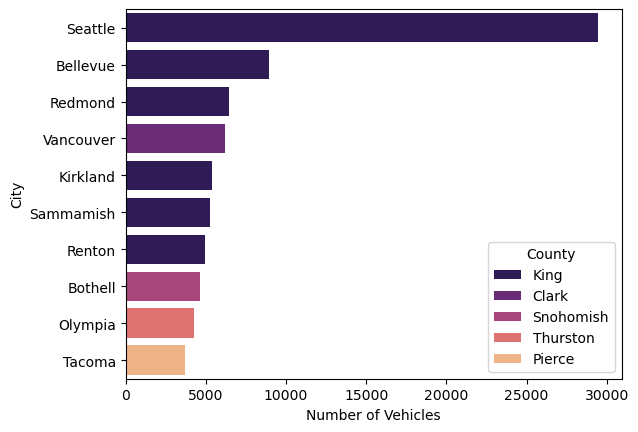

In [98]:
df_county = df['County'].value_counts().head(5).index
df_county

top_counties_data = df[df['County'].isin(df_county)]
top_counties_data

top_city = top_counties_data.groupby(['County','City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles').head(10)
top_city

sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_city, palette="magma")
plt.show()

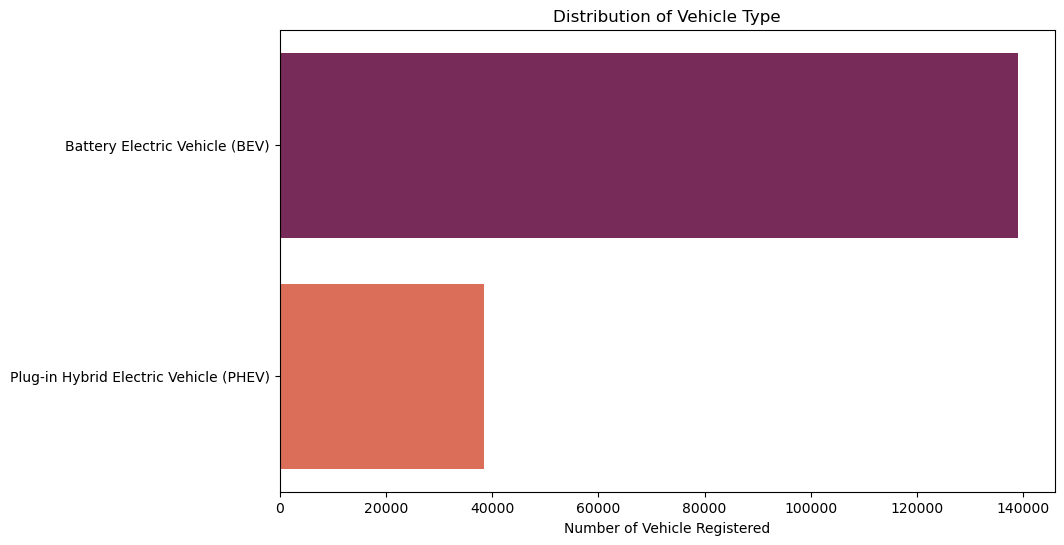

In [97]:
plt.figure(figsize=(10, 6))
df_electric = df['Electric Vehicle Type'].value_counts()
sns.barplot(x = df_electric.values, y = df_electric.index, hue = df_electric.index, palette='rocket')
plt.ylabel('')
plt.xlabel('Number of Vehicle Registered')
plt.title("Distribution of Vehicle Type")
plt.show()

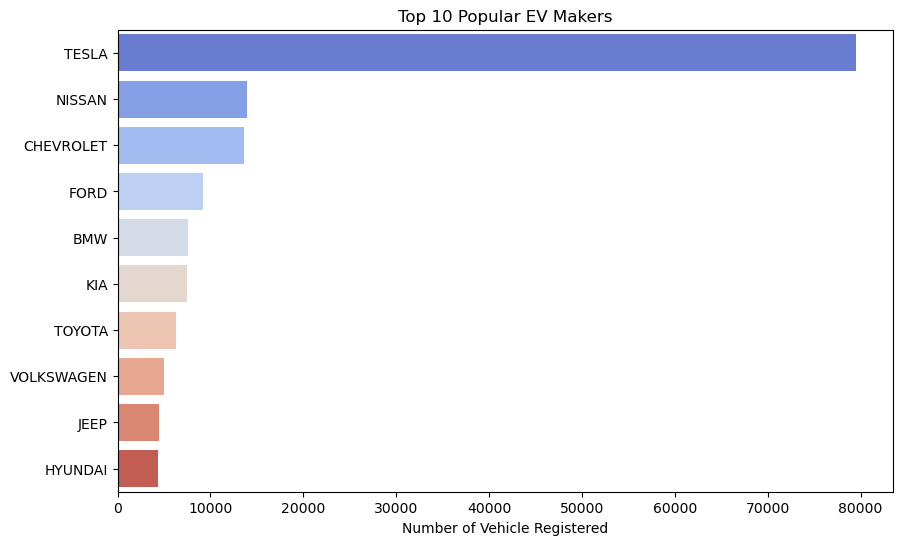

In [96]:
plt.figure(figsize=(10, 6))
df_make = df['Make'].value_counts().head(10)
sns.barplot(x = df_make.values, y =df_make.index, hue=df_make.index, palette='coolwarm' )
plt.ylabel('')
plt.xlabel('Number of Vehicle Registered')
plt.title('Top 10 Popular EV Makers')
plt.show()

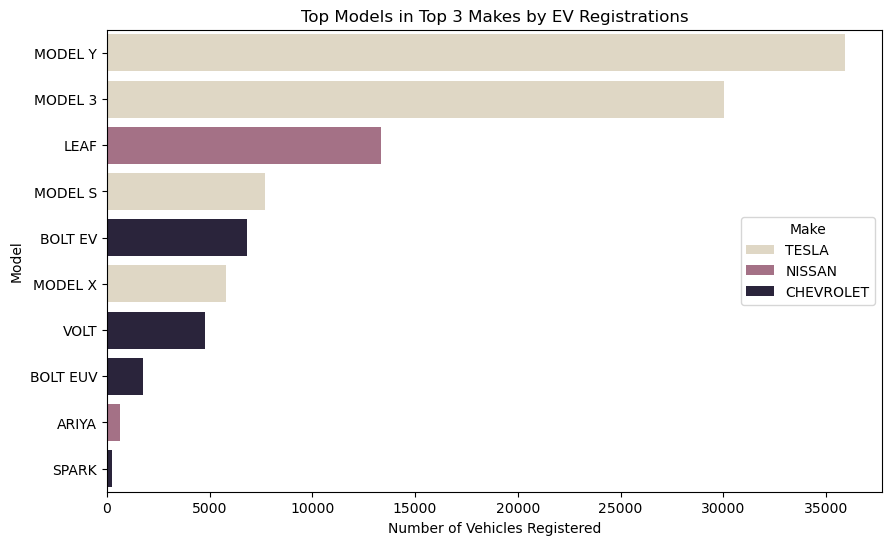

In [95]:
df_make_3 = df_make.head(3)
df_make_3 = df_make_3.index
df_model = df[df['Make'].isin(df_make_3)]
df_model_3 = df_model.groupby(['Make','Model']).size().sort_values(ascending=False).head(10).reset_index(name = 'Number of Vehicles')
plt.figure(figsize=(10, 6))
sns.barplot(x = df_model_3['Number of Vehicles'], y =df_model_3['Model'], hue=df_model_3['Make'], palette='ch:s=-.2,r=.6')
plt.legend(title='Make', loc='center right')
plt.xlabel('Number of Vehicles Registered')
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.show()

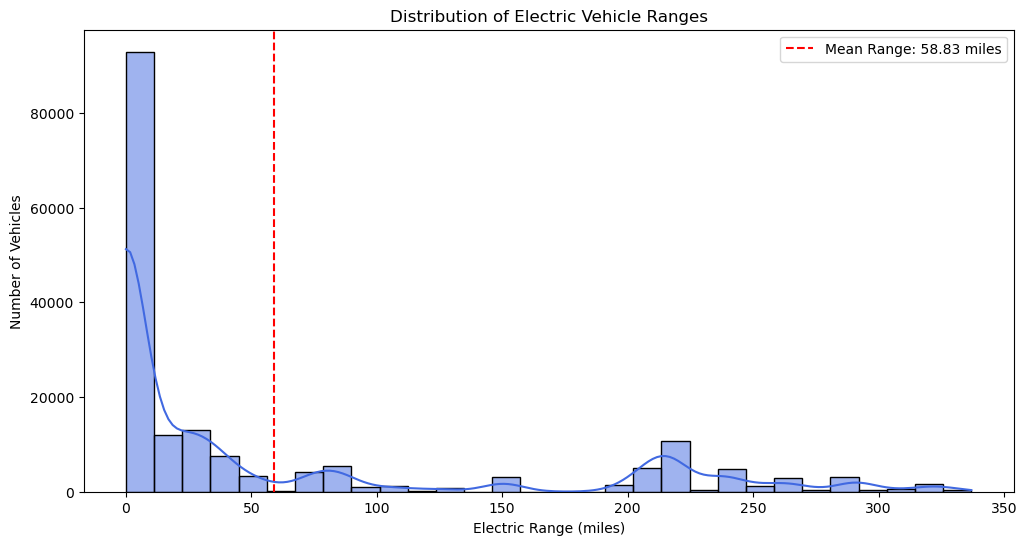

In [94]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Electric Range'], bins=30, kde = True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(df['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {df["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()